In [ ]:
pip install ffmpeg-python 

In [1]:
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import scienceplots
from IPython.display import HTML


# Style
plt.style.use(['seaborn', 'science', 'nature','no-latex'])
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

<IPython.core.display.Javascript object>


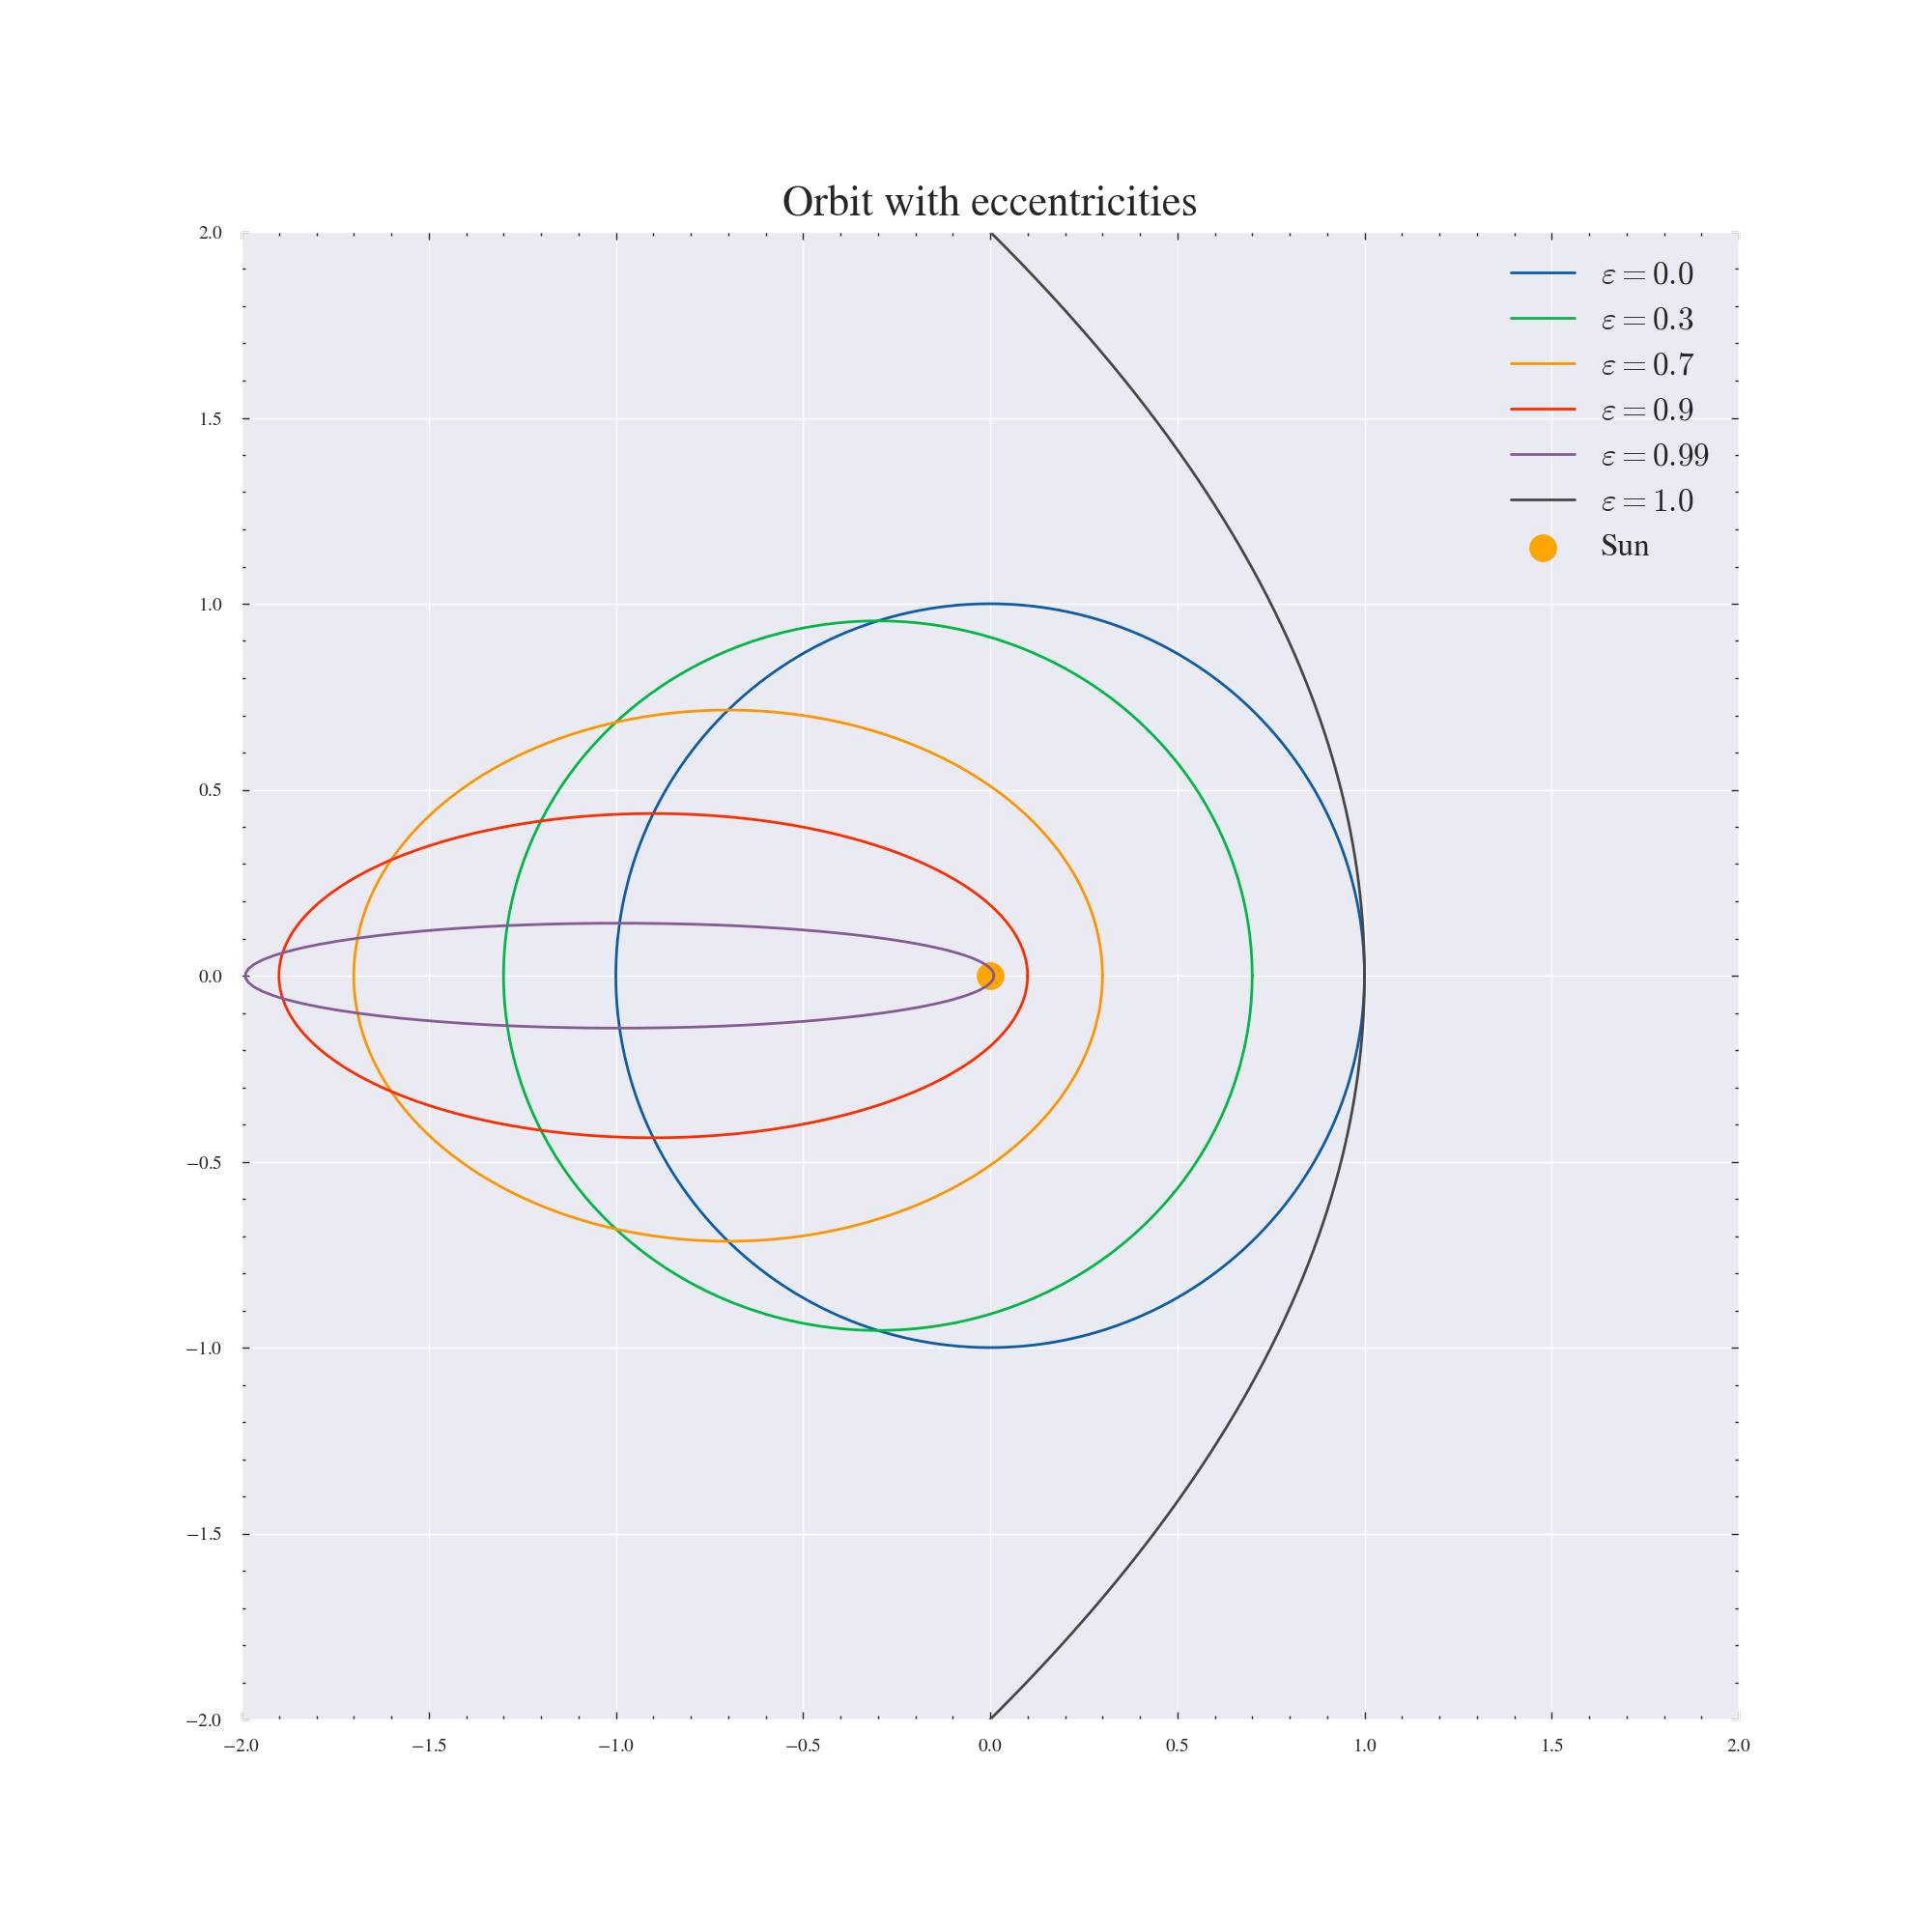

In [16]:
# List with eccentricity values
excentricidades = [0.0, 0.3, 0.7, 0.9, 0.99]
plt.figure(figsize=(10, 10))

# Iterating through the list
for e in excentricidades:
    # Orbit parameters
    a = 1.0  # Major axis

    # Calculation of the minor axis (b)
    b = a * np.sqrt(1 - e**2)

    # Angles for the range from 0 to 2*pi
    theta = np.linspace(0, 2*np.pi, 1000)

    # Polar coordinates
    r = a * (1 - e**2) / (1 + e * np.cos(theta))

    # Conversion to Cartesian coordinates
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # Plot of the orbit
    plt.plot(x, y, label=f'$\\varepsilon = {e}$')

# Parabolic trajectory
theta = np.linspace(0, 2*np.pi, 1000)
r = 2 * a / (1 + np.cos(theta))
x = r * np.cos(theta)
y = r * np.sin(theta)
plt.plot(x, y, label=r'$\varepsilon = 1.0$')

# Planet
plt.scatter(0, 0, s=100, c='orange', label='Sun')
    
plt.title('Orbit with eccentricities', fontsize=16)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.legend(fontsize=12)
# plt.axis('equal')  # To make axes have the same scale
plt.show()


MovieWriter ffmpeg unavailable; using Pillow instead.


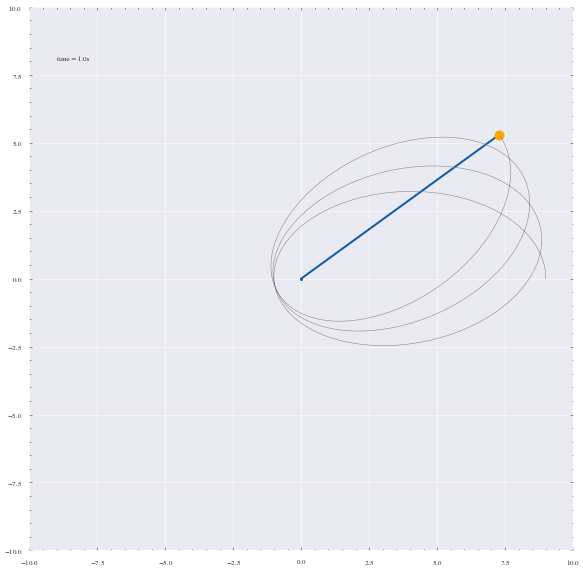

In [2]:
# Precession of Mercury's perihelion

# Constants
def pos(t, a, b, vtheta, vphi):
    x = (np.sqrt(a**2 - b**2) + a*np.cos(2*np.pi*vtheta*t)) * np.cos(2*np.pi*vphi*t) - b * np.sin(2*np.pi*vtheta*t) * np.sin(2*np.pi*vphi*t)
    y = (np.sqrt(a**2 - b**2) + a*np.cos(2*np.pi*vtheta*t)) * np.sin(2*np.pi*vphi*t) + b * np.sin(2*np.pi*vtheta*t) * np.cos(2*np.pi*vphi*t)

    return x, y

# Orbit parameters
a = 5.0  # Major semi-axis
b = 3.0  # Minor semi-axis
vtheta = 3.0  # Angular velocity in theta
vphi = 0.10  # Angular velocity in phi

# Initial conditions
t0 = 0.0  # Initial time
tf = 1.0  # Final time

# Trajectory
t = np.linspace(t0, tf, 1000)
x, y = pos(t, a, b, vtheta, vphi)

# Animation
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-10, 10), ylim=(-10, 10))
ax.set_aspect('equal')

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
mercury, = ax.plot([], [], 'o', c='orange', ms=10)
trace, = ax.plot([], [], '-', c='gray', lw=0.5)

def init():
    line.set_data([], [])
    time_text.set_text('')
    mercury.set_data([], [])
    trace.set_data([], [])
    return line, time_text

def animate(i):
    thisx = [0, x[i]]
    thisy = [0, y[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*tf/1000))
    mercury.set_data(x[i], y[i])
    trace.set_data(x[:i], y[:i])
    return line, time_text, mercury, trace

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                              interval=25, blit=True, init_func=init)

ani.save('precession.gif', fps=len(t)/tf)


MovieWriter imagemagick unavailable; using Pillow instead.


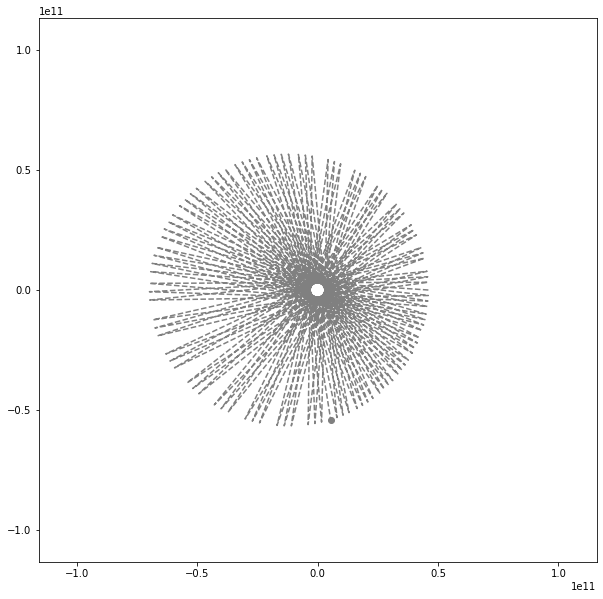

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# Constants
G = 6.67430e-11
M = 1.9885e30

# Parameters of Mercury's orbit
a = 0.38709893 * 149.6e9  # Semi-major axis in meters
e = 0.20563069  # Eccentricity
b = a * np.sqrt(1 - e**2)  # Semi-minor axis
T = 0.2408467 * 365.25 * 24 * 3600  # Orbital period in seconds
omega = 0.46669835  # Angular velocity

# Calculating Mercury's position in its orbit
def position(t, a, b, omega):
    r = (a * (1 - e**2)) / (1 + e * np.cos(omega * t))
    x = r * np.cos(omega * t)
    y = r * np.sin(omega * t)
    return x, y

# Creating the figure and axes
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(xlim=(-a*2, a*2), ylim=(-b*2, b*2))

# List to store Mercury's positions
xdata, ydata = [], []

# Creating the object that represents Mercury
mercury, = ax.plot([], [], 'o', color='gray')

# Orbit line
x, y = position(np.linspace(0, T, 30000), a, b, omega)
orbit, = ax.plot(x, y, '--', color='gray')

# Initialization function for the animation
def init():
    mercury.set_data([], [])
    return mercury,

# Animation function
def animate(i):
    x, y = position(i, a, b, omega)
    mercury.set_data(x, y)
    orbit.set_data(x, y)
    xdata.append(x)
    ydata.append(y)
    # To trace the orbit
    orbit.set_data(xdata, ydata)
    return mercury, orbit

# Creating the animation
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=np.arange(0, T, T/100), interval=40)

# Saving the animation
anim.save('mercury.gif', writer='imagemagick', fps=len(np.arange(0, T, T/100))/10)
